https://zaynmak.github.io/posts/Linear-Regression/Linear-Regression.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from linear import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

np.random.seed(3)

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

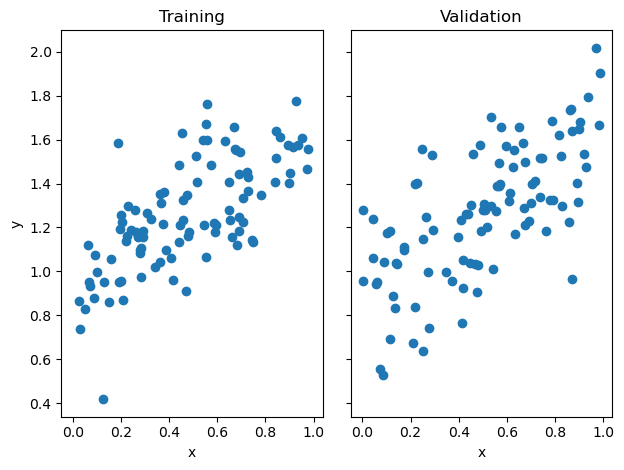

In [2]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

In [3]:
LR = LinearRegression()
LR.fit_analytic(X_train, y_train)

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.487
Validation score = 0.4633


In [4]:
LR.w

array([0.66678259, 0.94007208])

In [5]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train, batch_size= 5, alpha = 0.01, max_iter = 1e2)
LR2.w

array([0.66766757, 0.94398317])

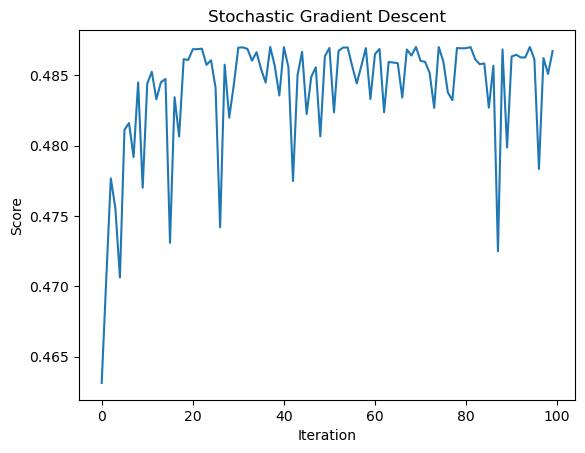

In [6]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score", title = "Stochastic Gradient Descent")

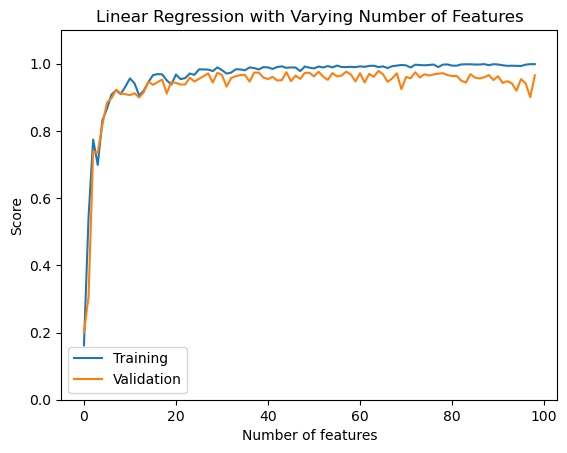

In [7]:
# Eperimenting with number of features
training_scores = []
validation_scores = []

for p_features in range(1, n_train):
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR = LinearRegression()
    LR.fit_gradient(X_train, y_train, batch_size= 3)
    # if p_features > 35:
    #     print(p_features, LR.score(X_train, y_train), LR.score(X_val, y_val))
    training_scores.append(LR.score(X_train, y_train))
    if p_features > 120:
        print("in between")
    validation_scores.append(LR.score(X_val, y_val))

plt.plot(training_scores, label = "Training")
plt.plot(validation_scores, label = "Validation")
plt.legend()
#  set maximum y value to 1
plt.ylim(0, 1.1)
labels = plt.gca().set(xlabel = "Number of features", ylabel = "Score", title = "Linear Regression with Varying Number of Features")


We see a sharp increase in training and validation scores as the number of features increase. After the features reach 5, both the scores on average plateau, also the  training score is mostly constitently slightly higher than the validation score. As we reach really high number of features, the training validation approaches 100% while the validation slowly starts decreasing which means the model has started overfitting. The  validation score would decrease faster, however the stochastic gradient descent slows down the process.

In [8]:
L = Lasso(alpha = 0.001)
p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)
L.score(X_val, y_val)

0.8144542416405391

/Users/zayn/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zayn/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


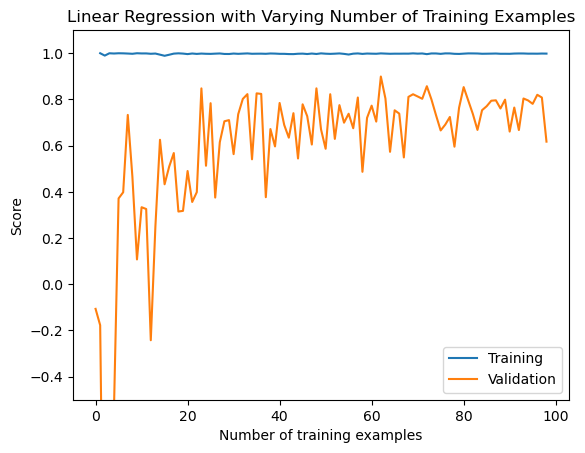

In [9]:
# Experimenting with number of training examples
training_scores = []
validation_scores = []

for p_features in range(1, n_train):
    L = Lasso(alpha = 0.001)
    X_train, y_train, X_val, y_val = LR_data(p_features, n_val, p_features, noise)
    L.fit(X_train, y_train)
    training_scores.append(L.score(X_train, y_train))
    validation_scores.append(L.score(X_val, y_val))

plt.plot(training_scores, label = "Training")
plt.plot(validation_scores, label = "Validation")
plt.legend()
#  set maximum y value to 1
plt.ylim(-0.5, 1.1)
labels = plt.gca().set(xlabel = "Number of training examples", ylabel = "Score", title = "Linear Regression with Varying Number of Training Examples")


We see the validation results are more volatile than the training results. This is because the validation results are based on a smaller subset of the data, and thus can be more drastically affected by the data points in the validation set.